In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

batch_size = 8
learning_rate = 1e-4
epochs = 10

model_type = "MiDaS_small"
model = torch.hub.load("intel-isl/MiDaS", model_type)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model.to(device)
print()

Using cache found in C:\Users\email/.cache\torch\hub\intel-isl_MiDaS_master


Loading weights:  None


Using cache found in C:\Users\email/.cache\torch\hub\rwightman_gen-efficientnet-pytorch_master


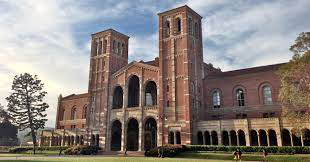

In [9]:
from PIL import Image
filename = 'sample.jpeg'
im = Image.open(filename)
display(im)


In [15]:
import cv2
criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")
transform = midas_transforms.small_transform
batch = transform(img).to(device)

Using cache found in C:\Users\email/.cache\torch\hub\intel-isl_MiDaS_master


Input size is torch.Size([1, 3, 128, 256])


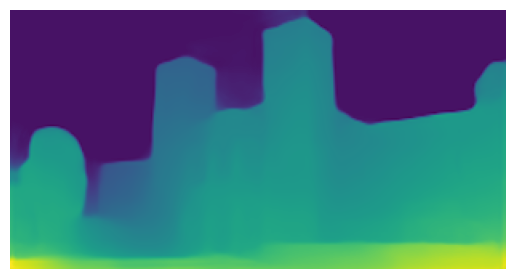

In [6]:
import matplotlib.pyplot as plt

print(f'Input size is {batch.shape}')
with torch.no_grad():
    prediction = model(batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()
plt.imshow(output)
plt.axis('off')
plt.show()


In [19]:
prediction

tensor([[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [455.4176, 448.4822, 438.2866,  ..., 421.3930, 434.2476, 438.5851],
        [453.6982, 452.6828, 444.6680,  ..., 425.3080, 436.2699, 433.8197],
        [447.8906, 447.6729, 445.3560,  ..., 422.4997, 433.7054, 426.6920]],
       device='cuda:0')